In [ ]:
import numpy as np 
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [ ]:
df = pd.read_csv('/gdrive/My Drive/ATiML/books_ALLFeatures.csv')

In [ ]:
df.columns

Index(['Unnamed: 0', 'file', 'male_count', 'female_count', 'para_count',
       'Content', 'Book_Name', 'guten_genre', 'Author_Name', 'Puch', 'book_id',
       'Conj-Prep', 'clean_data', 'no_ofCommas', 'no_coln', 'no_period',
       'no_doubleQuotes', 'number_sen', 'lexical_diversity_score_onChunk',
       'normalized_ttr_chunk', 'flesh_reading_score', 'normalized_frs',
       'PropNouns', 'Compound', 'Neg', 'Neutral', 'Positive'],
      dtype='object')

In [ ]:
df['clean_data'][0]

' steeple church beautiful chime bell many year rung joyous peal touch sexton hand upon rope make full music said slumber christmas people shall glad right merry chime shall ring soon sleep gathered close embrace vision morrow flitted brain midnight dark cloud swept tower darker shadow discontent fell peaceful chime hark discordant sound heard among bell ringing seven long year murmured highest bell chime well placed said voice bell rung long enough besides weary always singing tone answered high bell clear sharp voice together make sweetest harmony returned bell next complainer well know tired tone bear monotony part mean answer call rope ring christmas exclaimed bell together exclaim much please common sympathy would moment weary singing high tone give note responded bell mean change weary note need change recast said bell sadly certainly like many silent morning sexton come ring answered bell boldly part silent refuse ring rest said remained quiet chime needed added sadly point rema

In [ ]:
df['file'][0]

'pg15895.txt'

In [ ]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 100000
# Max number of words in each book.
MAX_SEQUENCE_LENGTH = 2000
# This is fixed.
EMBEDDING_DIM = 100
trunc_type='post'
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True,oov_token=oov_tok)
tokenizer.fit_on_texts(df['clean_data'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 140101 unique tokens.


In [ ]:
X = tokenizer.texts_to_sequences(df['clean_data'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH, truncating=trunc_type)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (993, 2000)


In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
Y = labelencoder.fit_transform(df['guten_genre'])
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (993,)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=42, stratify = np.array(df['guten_genre']))
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(695, 2000) (695,)
(298, 2000) (298,)


In [ ]:
model = tf.keras.Sequential([
	tf.keras.layers.Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,dropout=0.2, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,dropout=0.2)),
    tf.keras.layers.Dense(9, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 2000, 100)         10000000  
_________________________________________________________________
bidirectional_4 (Bidirection (None, 2000, 128)         84480     
_________________________________________________________________
bidirectional_5 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_2 (Dense)              (None, 9)                 585       
Total params: 10,126,281
Trainable params: 10,126,281
Non-trainable params: 0
_________________________________________________________________


In [ ]:
epochs = 100
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/100
10/10 [==============================] - 10s 1s/step - loss: 2.0721 - accuracy: 0.6960 - val_loss: 1.6704 - val_accuracy: 0.8429
Epoch 2/100
10/10 [==============================] - 9s 892ms/step - loss: 1.0984 - accuracy: 0.7920 - val_loss: 0.6914 - val_accuracy: 0.8429
Epoch 3/100
10/10 [==============================] - 9s 885ms/step - loss: 0.8378 - accuracy: 0.7920 - val_loss: 0.7056 - val_accuracy: 0.8429
Epoch 4/100
10/10 [==============================] - 9s 886ms/step - loss: 0.8155 - accuracy: 0.7920 - val_loss: 0.6936 - val_accuracy: 0.8429
Epoch 5/100
10/10 [==============================] - 9s 889ms/step - loss: 0.8076 - accuracy: 0.7920 - val_loss: 0.6923 - val_accuracy: 0.8429


In [ ]:
print(Y_test)

[5 5 5 5 2 5 5 5 5 2 5 2 7 5 5 5 5 5 5 5 5 5 5 5 7 5 5 5 5 5 2 5 2 5 5 2 5
 5 2 5 5 7 0 2 6 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 4 5 5 5 5 5 5 8 5 5
 5 5 5 5 5 5 7 5 5 2 5 5 3 5 5 5 5 5 5 7 7 5 2 5 5 5 2 5 5 5 5 5 5 5 5 5 5
 5 2 5 2 5 5 5 5 5 3 5 5 5 5 5 5 5 5 5 5 5 5 7 5 2 5 5 5 2 5 5 5 2 5 7 5 5
 5 5 2 5 5 5 5 5 5 5 5 5 5 5 5 5 2 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 1 5 5 5 5 5 6 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 2 5 2 2 5 5 5 5 5 2 6 8 5
 5 5 5 5 5 7 5 5 5 5 5 5 2 5 5 6 5 2 5 5 5 5 5 5 5 5 5 5 2 5 5 5 5 5 5 5 5
 5 8 2 5 5 5 5 6 5 2 5 5 2 8 5 5 5 7 2 5 5 5 2 2 5 5 5 5 5 8 5 4 5 2 7 5 2
 5 5]


In [ ]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report,confusion_matrix
predictions=model.predict_classes(X_test)
train_pred=model.predict_classes(X_train)
print("train accuracy: {} ".format(accuracy_score(Y_train,train_pred,normalize=True, sample_weight=None)))
print("test accuracy: {} ".format(accuracy_score(Y_test,predictions,normalize=True, sample_weight=None))) 
print('Testing F1 score: {}'.format(f1_score(Y_test,predictions, average='weighted')))

train accuracy: 0.7971223021582734 
test accuracy: 0.7986577181208053 
Testing F1 score: 0.7092557347490733


In [ ]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

10/10 [==============================] - 3s 312ms/step - loss: 0.7884 - accuracy: 0.7987
Test set
  Loss: 0.788
  Accuracy: 0.799


In [ ]:
print("Confusion Matrix:     ")
print(confusion_matrix(Y_test, predictions))
        
print("\n\nClassification Report:       ")
print(classification_report(Y_test, predictions))

Confusion Matrix:     
[[  0   0   0   0   0   1   0   0   0]
 [  0   0   0   0   0   1   0   0   0]
 [  0   0   0   0   0  33   0   0   0]
 [  0   0   0   0   0   2   0   0   0]
 [  0   0   0   0   0   2   0   0   0]
 [  0   0   0   0   0 238   0   0   0]
 [  0   0   0   0   0   5   0   0   0]
 [  0   0   0   0   0  11   0   0   0]
 [  0   0   0   0   0   5   0   0   0]]


Classification Report:       
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00        33
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         2
           5       0.80      1.00      0.89       238
           6       0.00      0.00      0.00         5
           7       0.00      0.00      0.00        11
           8       0.00      0.00      0.00         5

    accuracy                           0.80       2

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


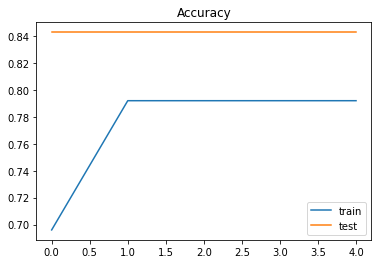

In [ ]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

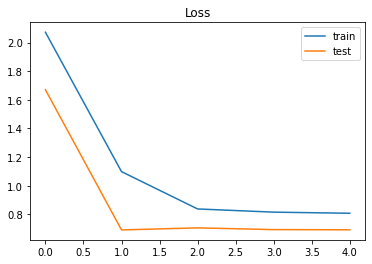

In [ ]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();